In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#Read the data
data = pd.read_csv("/kaggle/input/upi-payment-apps-review-google-play-store/GooglePayIndia.csv")

In [3]:
data.head()

,Unnamed: 0,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt
0,0,gp:AOqpTOEdT_VactGi_J9Q2PEWY7J4XlD7BINhOj9xwOr...,Len Pagnam,https://play-lh.googleusercontent.com/a-/AOh14...,How do add a boarding pass? I see no passes tab.,1,0,2.137.401329300,2021-11-18 17:03:06,Hi Len. Could you try the steps in this guide ...,2021-11-18 17:27:11
1,1,gp:AOqpTOHltpCzXurPoFUgj-a3L-wApC93-fTvocbF9K7...,Benjamin Silva,https://play-lh.googleusercontent.com/a/AATXAJ...,Best,5,0,2.134.392709498,2021-11-18 16:43:34,NaN,NaN
2,2,gp:AOqpTOGTiyxy_FWSQe7eCONa7PsIP6v7cS-xWCL6jFF...,PARVESH MIAR,https://play-lh.googleusercontent.com/a-/AOh14...,All ok,5,0,2.138.406141160,2021-11-18 16:12:42,NaN,NaN
3,3,gp:AOqpTOHllyGnmLGZqPUGokxYncq9kOKoY3Zz_4ZF6b0...,Mikko L.,https://play-lh.googleusercontent.com/a-/AOh14...,"Rasy to use really... But there never, ever sh...",3,0,2.138.406141160,2021-11-18 16:06:35,NaN,NaN
4,4,gp:AOqpTOHjnJ6gAF4NzruhLDGVszAaTKSerVeKt-UtJfM...,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,I still do not understand why your restricting...,3,251,2.134.392709498,2021-11-18 15:48:08,NaN,NaN


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34228 entries, 0 to 34227
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Unnamed: 0            34228 non-null  int64 
 1   reviewId              34228 non-null  object
 2   userName              34227 non-null  object
 3   userImage             34228 non-null  object
 4   content               34219 non-null  object
 5   score                 34228 non-null  int64 
 6   thumbsUpCount         34228 non-null  int64 
 7   reviewCreatedVersion  29987 non-null  object
 8   at                    34228 non-null  object
 9   replyContent          6112 non-null   object
 10  repliedAt             6112 non-null   object
dtypes: int64(3), object(8)
memory usage: 2.9+ MB


In [5]:
data.describe()

,Unnamed: 0,score,thumbsUpCount
count,34228.000000,34228.000000,34228.000000
mean,17113.500000,3.651689,3.537718
std,9880.916843,1.715733,29.213717
min,0.000000,1.000000,0.000000
25%,8556.750000,1.000000,0.000000
50%,17113.500000,5.000000,0.000000
75%,25670.250000,5.000000,1.000000
max,34227.000000,5.000000,1921.000000


In [6]:
data=data.drop(['replyContent','repliedAt'],axis=1)

<Axes: >

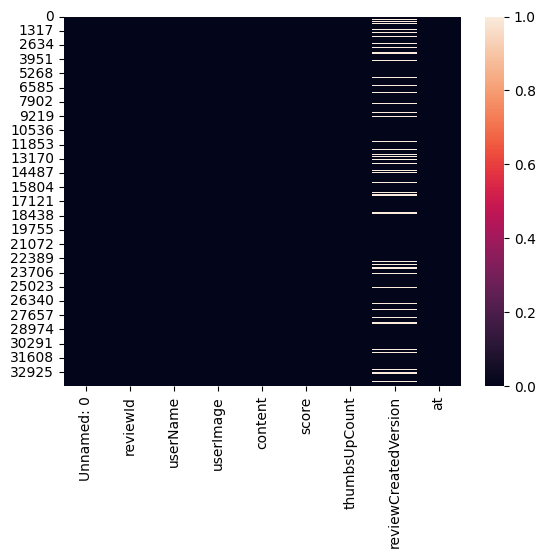

In [7]:
sns.heatmap(data.isnull())

In [8]:
data = data.dropna()

In [9]:
data.isnull().sum()

Unnamed: 0              0
reviewId                0
userName                0
userImage               0
content                 0
score                   0
thumbsUpCount           0
reviewCreatedVersion    0
at                      0
dtype: int64

In [10]:
data.shape

(29978, 9)

In [11]:
data_new=data[(data.score==1) | (data.score==5)]

In [12]:
data_new.head()

,Unnamed: 0,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at
0,0,gp:AOqpTOEdT_VactGi_J9Q2PEWY7J4XlD7BINhOj9xwOr...,Len Pagnam,https://play-lh.googleusercontent.com/a-/AOh14...,How do add a boarding pass? I see no passes tab.,1,0,2.137.401329300,2021-11-18 17:03:06
1,1,gp:AOqpTOHltpCzXurPoFUgj-a3L-wApC93-fTvocbF9K7...,Benjamin Silva,https://play-lh.googleusercontent.com/a/AATXAJ...,Best,5,0,2.134.392709498,2021-11-18 16:43:34
2,2,gp:AOqpTOGTiyxy_FWSQe7eCONa7PsIP6v7cS-xWCL6jFF...,PARVESH MIAR,https://play-lh.googleusercontent.com/a-/AOh14...,All ok,5,0,2.138.406141160,2021-11-18 16:12:42
7,7,gp:AOqpTOGtGq9UD4JtPm9Sk9FFwabOopeIUlfCyXnjzRv...,Robin Cramp,https://play-lh.googleusercontent.com/a/AATXAJ...,App is now working for me as expected. Google ...,5,11,2.138.406141160,2021-11-18 14:05:44
8,8,gp:AOqpTOEdjQ2KHKNbHnEk25WQ6fKlbZcABSRSglLImIz...,Matthew Chandler,https://play-lh.googleusercontent.com/a-/AOh14...,Good,5,0,2.138.406141160,2021-11-18 13:38:21


In [13]:
data_new.shape

(24164, 9)

In [14]:
data_new = data_new.assign(length=data_new['content'].apply(lambda x: len(x)))


In [15]:
data_new

,Unnamed: 0,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,length
0,0,gp:AOqpTOEdT_VactGi_J9Q2PEWY7J4XlD7BINhOj9xwOr...,Len Pagnam,https://play-lh.googleusercontent.com/a-/AOh14...,How do add a boarding pass? I see no passes tab.,1,0,2.137.401329300,2021-11-18 17:03:06,48
1,1,gp:AOqpTOHltpCzXurPoFUgj-a3L-wApC93-fTvocbF9K7...,Benjamin Silva,https://play-lh.googleusercontent.com/a/AATXAJ...,Best,5,0,2.134.392709498,2021-11-18 16:43:34,4
2,2,gp:AOqpTOGTiyxy_FWSQe7eCONa7PsIP6v7cS-xWCL6jFF...,PARVESH MIAR,https://play-lh.googleusercontent.com/a-/AOh14...,All ok,5,0,2.138.406141160,2021-11-18 16:12:42,6
7,7,gp:AOqpTOGtGq9UD4JtPm9Sk9FFwabOopeIUlfCyXnjzRv...,Robin Cramp,https://play-lh.googleusercontent.com/a/AATXAJ...,App is now working for me as expected. Google ...,5,11,2.138.406141160,2021-11-18 14:05:44,346
8,8,gp:AOqpTOEdjQ2KHKNbHnEk25WQ6fKlbZcABSRSglLImIz...,Matthew Chandler,https://play-lh.googleusercontent.com/a-/AOh14...,Good,5,0,2.138.406141160,2021-11-18 13:38:21,4
...,...,...,...,...,...,...,...,...,...,...
34223,34223,gp:AOqpTOEXYnopFG3RZ8fVrBC9yqXnVjmhnDI0Ji99tXb...,Daran Smith,https://play-lh.googleusercontent.com/a-/AOh14...,Like it good app,5,0,2.96.264233179,2019-10-01 02:47:10,16
34224,34224,gp:AOqpTOEVXSkb09ThJsY2TZ0awLgMSCO0qzySxtcT7x9...,Judi Anne,https://play-lh.googleusercontent.com/a-/AOh14...,Excellent very easy to use,5,0,2.95.262992467,2019-10-01 02:38:48,26
34225,34225,gp:AOqpTOHv3DyIxgg2a61I_QQGgjbFodIUp6UlaUpd4M9...,Noori Lal,https://play-lh.googleusercontent.com/a-/AOh14...,Easy to use.,5,0,2.96.264233179,2019-10-01 02:17:54,12
34226,34226,gp:AOqpTOHEnAmESklDXdnvO13QBDl9gOlH4M1qQs-gMYS...,Josh Phillips,https://play-lh.googleusercontent.com/a-/AOh14...,Works how it should,5,0,2.96.264233179,2019-10-01 02:09:34,19


In [16]:
data_new = pd.DataFrame(data=data_new, columns =['content', 'length', 'score'])

In [17]:
data_new.head()

,content,length,score
0,How do add a boarding pass? I see no passes tab.,48,1
1,Best,4,5
2,All ok,6,5
7,App is now working for me as expected. Google ...,346,5
8,Good,4,5


In [18]:
import string

In [19]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [20]:
data_new['nopunc'] = data_new['content'].apply(lambda x: [a for a in x if a not in string.punctuation])

In [21]:
data_new = pd.DataFrame(data=data_new, columns =['nopunc', 'length', 'score'])

In [22]:
data_new['nopunc'] = data_new['nopunc'].apply(''.join)

In [23]:
data_new

,nopunc,length,score
0,How do add a boarding pass I see no passes tab,48,1
1,Best,4,5
2,All ok,6,5
7,App is now working for me as expected Google P...,346,5
8,Good,4,5
...,...,...,...
34223,Like it good app,16,5
34224,Excellent very easy to use,26,5
34225,Easy to use,12,5
34226,Works how it should,19,5


In [24]:
X = data_new['nopunc']
y = data_new['score']

In [25]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

In [26]:
X = cv.fit_transform(X)

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=101)

In [29]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()

In [30]:
nb.fit(X_train, y_train)

MultinomialNB()

In [31]:
pred = nb.predict(X_test)

In [32]:
from sklearn.metrics import classification_report

In [33]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           1       0.83      0.90      0.86      2140
           5       0.96      0.92      0.94      5110

    accuracy                           0.92      7250
   macro avg       0.89      0.91      0.90      7250
weighted avg       0.92      0.92      0.92      7250



In [34]:
from sklearn.feature_extraction.text import  TfidfTransformer

In [35]:
from sklearn.pipeline import Pipeline

In [36]:
pipeline = Pipeline([
    ('bow', CountVectorizer()),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', MultinomialNB()),  # train on TF-IDF vectors w/ Naive Bayes classifier
])

In [37]:
X=data_new['nopunc']
y=data_new['score']
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3,random_state=101)

In [38]:
pipeline.fit(X_train,y_train)

Pipeline(steps=[('bow', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('classifier', MultinomialNB())])

In [39]:
y_pred = pipeline.predict(X_test)

In [40]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       0.87      0.83      0.85      2140
           5       0.93      0.95      0.94      5110

    accuracy                           0.91      7250
   macro avg       0.90      0.89      0.89      7250
weighted avg       0.91      0.91      0.91      7250

